Original Size: 169490 bytes
Compressed Size (JPEG): 13451 bytes


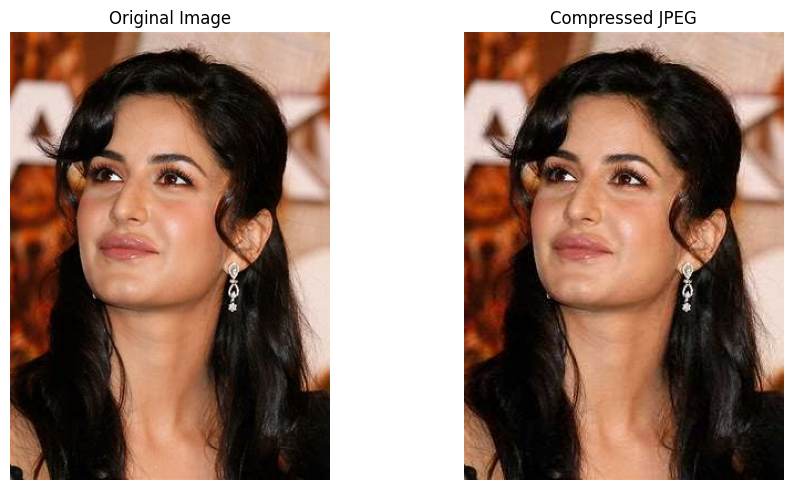

Compressed Size (PNG): 169490 bytes


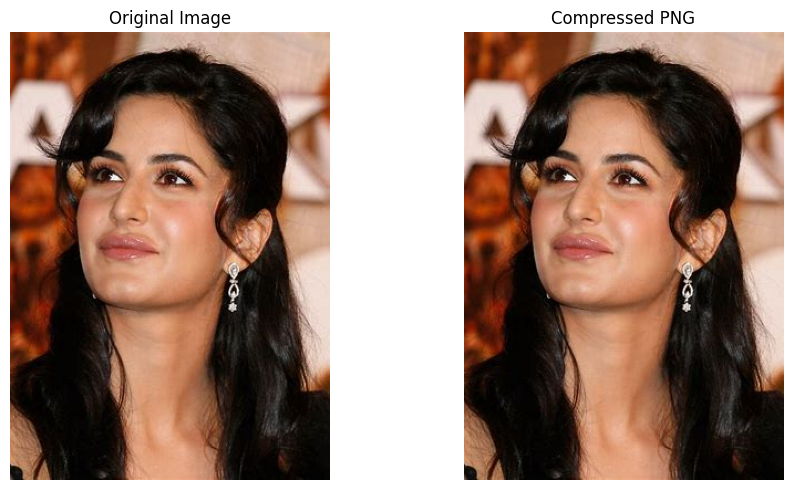

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - accuracy: 0.8043 - loss: 0.6506 - val_accuracy: 0.9749 - val_loss: 0.0831
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.9765 - loss: 0.0753 - val_accuracy: 0.9795 - val_loss: 0.0692
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.9839 - loss: 0.0521 - val_accuracy: 0.9871 - val_loss: 0.0470
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9860 - loss: 0.0431
Test Accuracy (MNIST): 0.9891999959945679
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99     

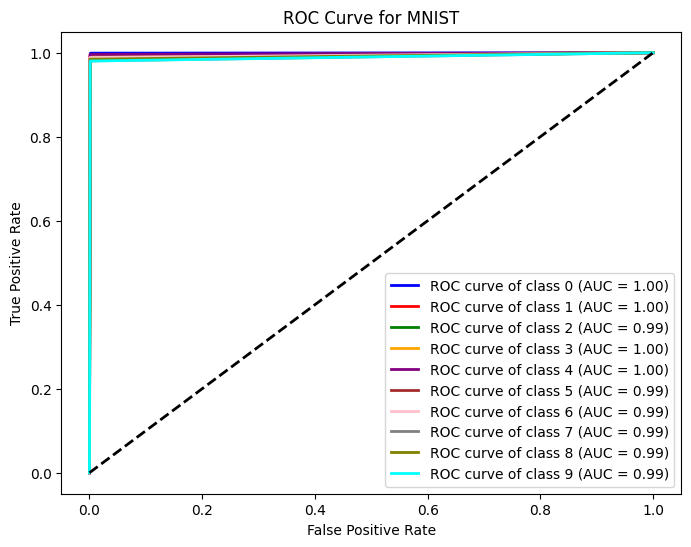

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 186ms/step - accuracy: 0.2801 - loss: 1.9393 - val_accuracy: 0.4691 - val_loss: 1.4536
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 175ms/step - accuracy: 0.4887 - loss: 1.4123 - val_accuracy: 0.5345 - val_loss: 1.3148
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.5475 - loss: 1.2652 - val_accuracy: 0.5707 - val_loss: 1.2043
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5812 - loss: 1.1896
Test Accuracy (CIFAR-10): 0.5763999819755554
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.49      0.59      1000
           1       0.72      0.68      0.70      1000
           2       0.48      0.40      0.43      1000
           3       0.39      0.45      0.42      1000
           4       0.49      0.49      0.49      1000
           5       0.51      0.52      0.52      1000
           6       0.79      0.55      0.65  

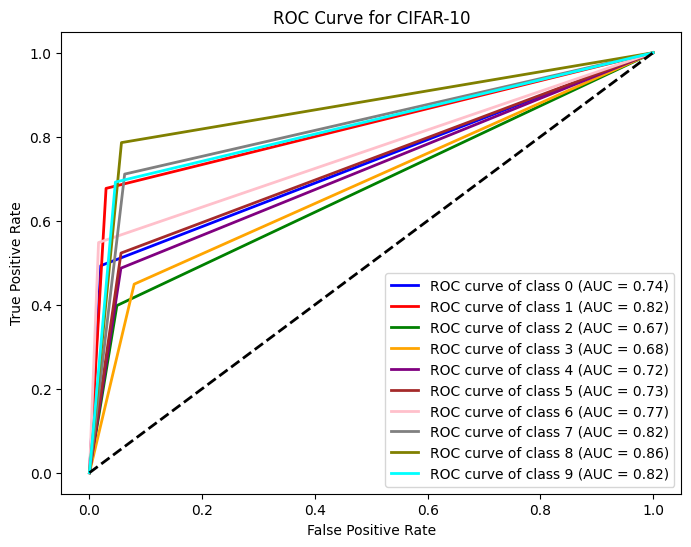

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical


def compress_image_jpeg(image_path, quality=50):
    image = Image.open(image_path)

    compressed_image_path = "compressed_image.jpg"
    image.save(compressed_image_path, "JPEG", quality=quality)

    original_size = os.path.getsize(image_path)
    compressed_size = os.path.getsize(compressed_image_path)

    print(f"Original Size: {original_size} bytes")
    print(f"Compressed Size (JPEG): {compressed_size} bytes")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(Image.open(compressed_image_path))
    plt.title("Compressed JPEG")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

def compress_image_png(image_path):
    image = Image.open(image_path)

    compressed_image_path = "/content/compressed_image.jpg"
    image.save(compressed_image_path, "PNG")

    compressed_size = os.path.getsize(compressed_image_path)

    print(f"Compressed Size (PNG): {compressed_size} bytes")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(Image.open(compressed_image_path))
    plt.title("Compressed PNG")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


def build_and_train_cnn(x_train, y_train, x_test, y_test, input_shape, num_classes, dataset_name):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy ({dataset_name}): {test_acc}")

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    print("Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true_classes, y_pred_classes))

    y_true_bin = label_binarize(y_true_classes, classes=np.arange(num_classes))
    y_pred_bin = label_binarize(y_pred_classes, classes=np.arange(num_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {dataset_name}')
    plt.legend(loc="lower right")
    plt.show()

def main():
    image_path = "/content/download.jpg"
    compress_image_jpeg(image_path)
    compress_image_png(image_path)

    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
    x_train_mnist = x_train_mnist.reshape((x_train_mnist.shape[0], 28, 28, 1)).astype('float32') / 255
    x_test_mnist = x_test_mnist.reshape((x_test_mnist.shape[0], 28, 28, 1)).astype('float32') / 255
    y_train_mnist = to_categorical(y_train_mnist)
    y_test_mnist = to_categorical(y_test_mnist)

    build_and_train_cnn(x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, (28, 28, 1), 10, "MNIST")

    (x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
    x_train_cifar = x_train_cifar.astype('float32') / 255
    x_test_cifar = x_test_cifar.astype('float32') / 255
    y_train_cifar = to_categorical(y_train_cifar, 10)
    y_test_cifar = to_categorical(y_test_cifar, 10)

    build_and_train_cnn(x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar, (32, 32, 3), 10, "CIFAR-10")

if __name__ == "__main__":
    main()